In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from features import *
plt.gray()

%matplotlib inline

# Feature Detection

The aim of feature detection is exactly as the name implies: to try to determine the existence or nonexistence of some feature in an image. There are many methods to do this, some of which are scale invariant and rotation invariant, but I have explored several of the simpler methods, which are neither scale nor rotation invariant.

### Template Matching (2-norm difference)
The first way one might think of determining the presence of a feature in an image on a patch by patch basis. If we have some pattern template $T\in \mathbb{R}^{M\times N}$ that we wish to find in the image $I$, we could take every patch $P$ of $I$ and see what the Frobenius norm /2-norm of the difference $P-T$, which would be zero if $P$ and $T$ were identical, and maximal ($\sqrt{T_wT_h}$) if they are the most dissimilar (assuming everything is in the 0-1 range, which I do here).
Therefore, our metric which we wish to minimize is:
\begin{equation}
    d_{TM}(x,y) = \sum_{i=y}^{y+M-1} \sum_{j=x}^{x+N-1} (I_{i,j}-T_{i-y, j-x})^2
\end{equation}

### Matched Filter
Template matching is nice in low noise settings because it strongly penalizes large distances between the template and image patch, but it has the notable disadvangage of being nonlinear. Linear operators have properties that tend to be useful, the idea of a matched filter is the more similar a patch $P$ and the template $T$, the greater their inner product. They also should be slightly more tolerant to noise than taking a squared difference because a large perturbation only will affect the sum linearly rather than quadratically, but if there are very similar patterns in a low noise image, using the difference might be more effective

### Normalized Cross Correlation
The last method I use is Normalized Cross-Correlation, which is a metric that is similar to cosine similarity, but normalizes for the energy in the window. It uses the metric
\begin{equation}
    d(x,y) = \frac{\sum_{i=y}^{y+M-1} \sum_{j=x}^{x+N-1}(I_{i,j}-\bar{I}_{y,x}) (T_{i-y, j-x}-\bar{T})}{
    \left(\sum_{i=y}^{y+M-1} \sum_{j=x}^{x+N-1}(I_{i,j}-\bar{I}_{y,x})^2 (T_{i-y, j-x}-\bar{T})^2\right)^{0.5}}
\end{equation}
where $\bar{I_{y,x}}$ mean of the window in $I$

J.P. Lewis, Fast Template Matching, Vision Interface 95, Canadian Image Processing
and Pattern Recognition Society, Quebec City, Canada, May 15-19, 1995, p. 120-123

## Experiments and results
As an experiment, we try each of these three on a segment of text with 38 'h's, with a threshold determined by guessing and checking. Further exploration of these three methods is done in the ROC notebook, but immediately, we can notice that at the correct threshold, they can have 100% accuracy. Looking at the responses of each, we see that a matched filter tends to output much lower similarities except around letters that have similar shapes to 'h', while the other two seem to have higher levels on average. We can also see this in the histogram below.

This histogram gives further insight into what happens in each of the three algorithms. The matched filter, which measures cosine similarity, falls off very quickly, while the 2-norm difference seems to have a fast drop-off as well, but when compared to the matched filter, this it falls away much more slowly. Cross-correlation has a fairly steady distribution, but has a small spike at 0.5, because all areas that are entirely white will have an activation of about 0.5.

In [2]:
im = plt.imread('./characters.png').mean(2)
t = plt.imread('./T.png')

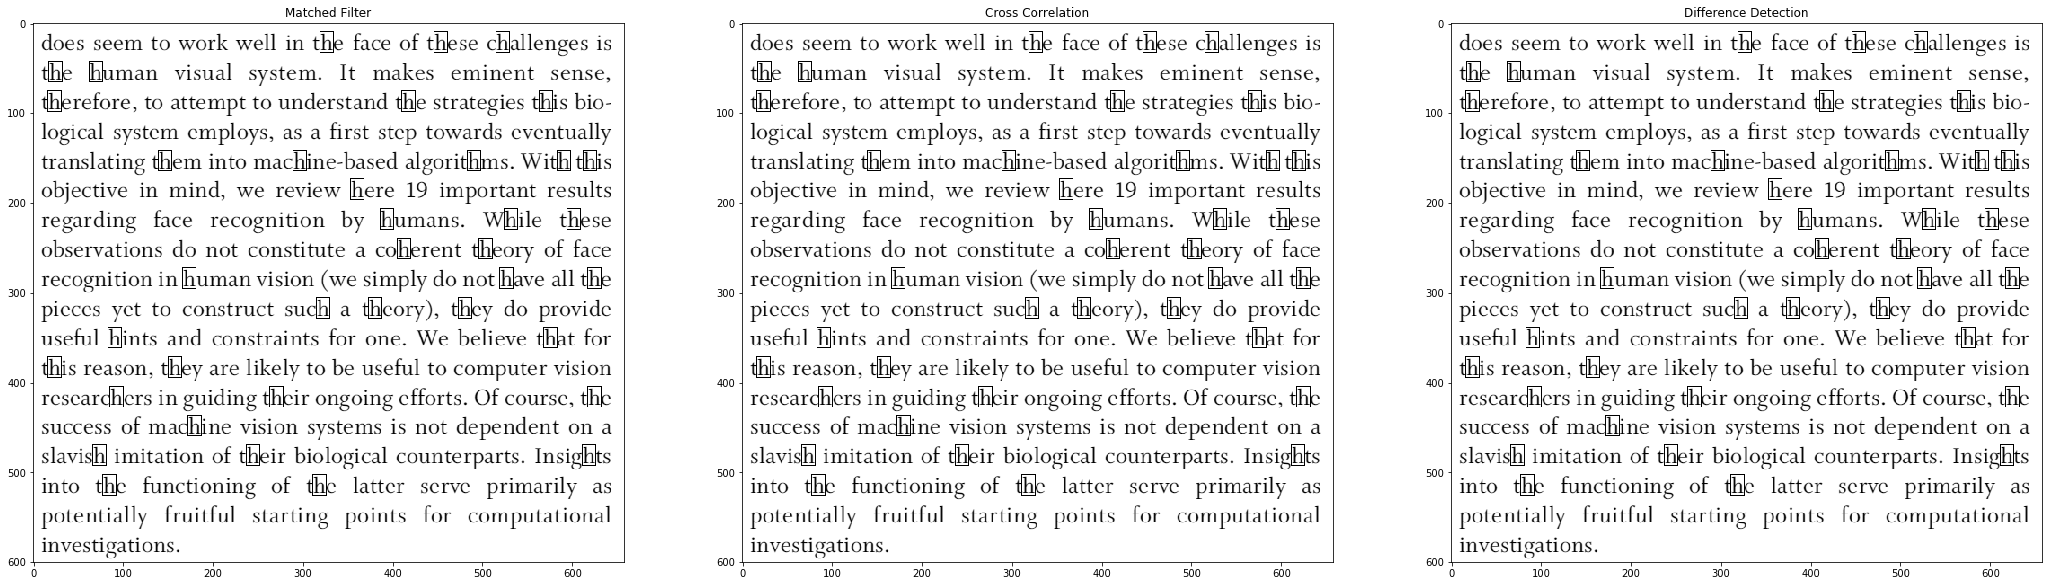

In [3]:
fig, ax = plt.subplots(ncols=3, figsize=(36,12))
fs = [matched_filter, cross_correlation, difference_detection]
names = ['Matched Filter', 'Cross Correlation', 'Difference Detection']
ts = [0.8, 0.97, 0.9]
for i in range(3):
    fd = fs[i](im, t)
    boxes = draw_boxes(fd>ts[i], t.shape)
    ax[i].imshow(im * (1-boxes))
    ax[i].set_title(names[i])

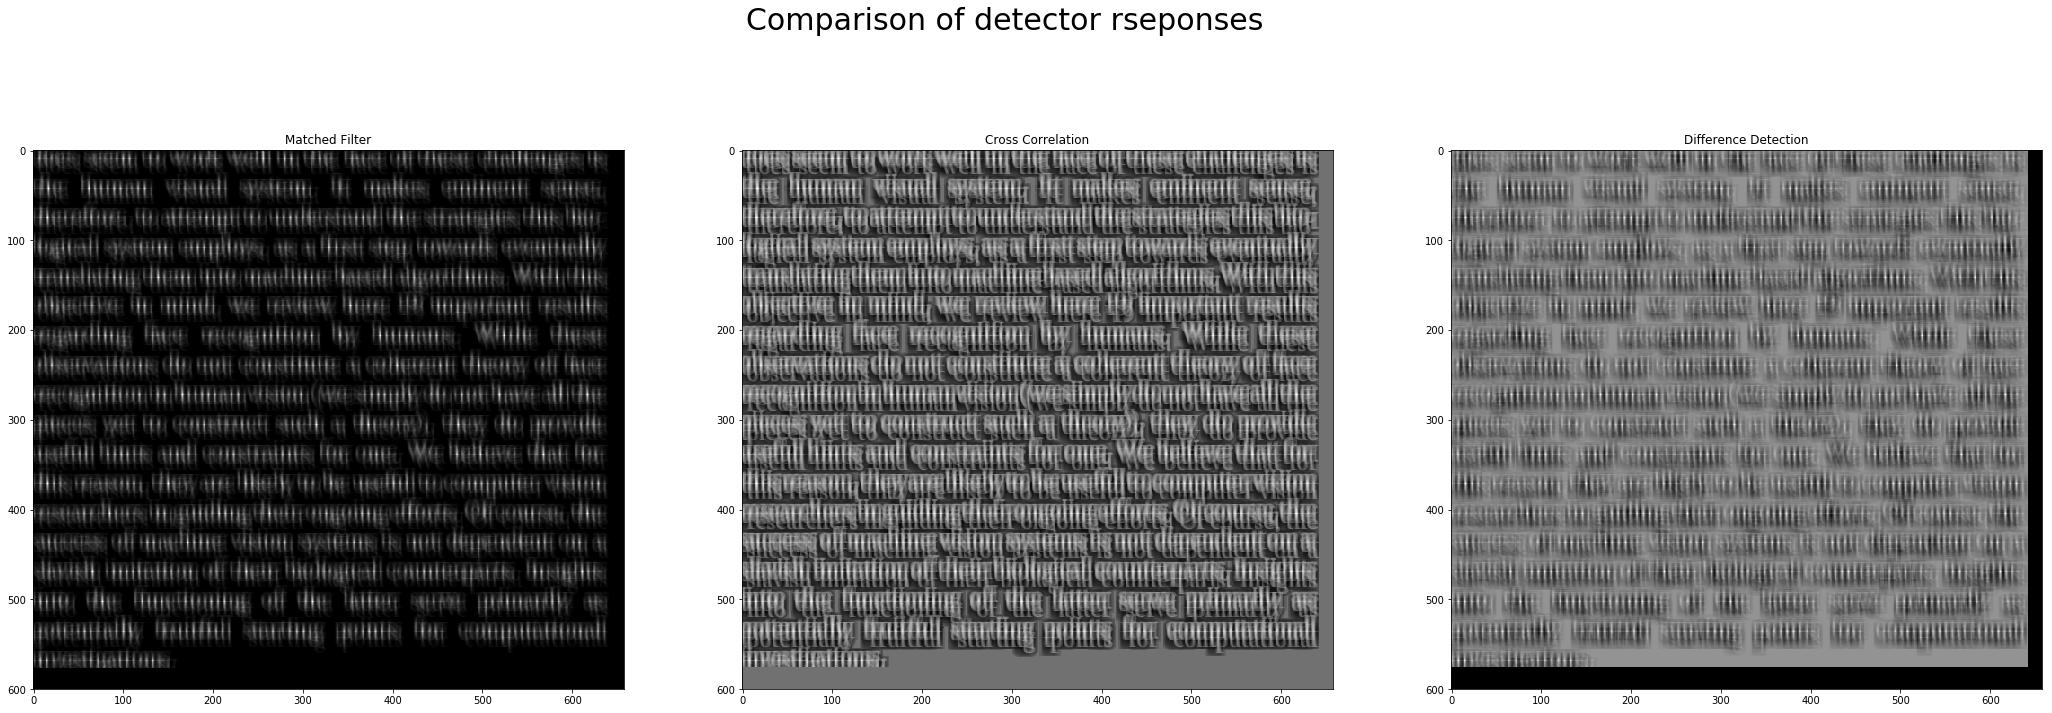

In [4]:
fig, ax = plt.subplots(ncols=3, figsize=(36,12))
fs = [matched_filter, cross_correlation, difference_detection]
fig.suptitle('Comparison of detector rseponses', fontsize=30)
names = ['Matched Filter', 'Cross Correlation', 'Difference Detection']
ts = [0.8, 0.97, 0.9]
for i in range(3):
    fd = fs[i](im, t)
    ax[i].imshow(fd)
    ax[i].set_title(names[i])

Text(0.5,0,'Feature detection activation')

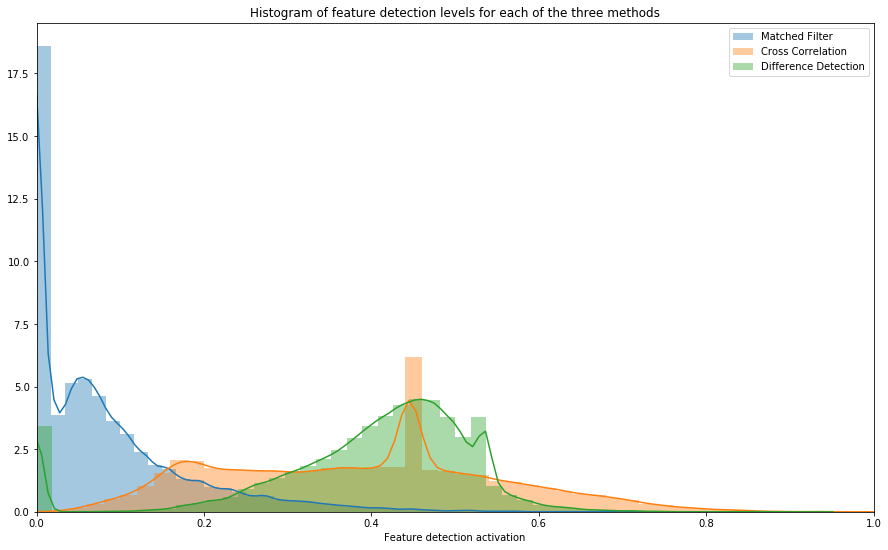

In [8]:
plt.figure(figsize=(15,9))
plt.title('Histogram of feature detection levels for each of the three methods')
for i in range(3):
    sns.distplot(fs[i](im, t).reshape(-1), label=names[i], norm_hist=True)
plt.legend(loc='best')
plt.xlim(0,1)
plt.xlabel('Feature detection activation')